## Statistical Analysis 
- Base Counts, Percentage Calculations
- Bar Charts, Pie Charts 
- GC, AT Calculation 
- GC, AT Distribution 
- K-mer Analysis (Bar Charts, Pie Charts) 
- Nucleotide Density-Monomer Density
- Nucleotide Density-Dimer Density

In [1]:
import screed # A Python library for reading FASTA and FASQ file format.
def readFastaFile(inputfile):
    """
    Reads and returns file as FASTA format with special characters removed.
    """
    with screed.open(inputfile) as seqfile:
        for read in seqfile:
            seq = read.sequence
    return seq 

In [2]:
# read sequence 
seq = readFastaFile("../data/Haemophilus_influenzae.fasta")

In [7]:
def basecount(seq): 
    """Count the frequencies of each bases in sequence"""
    freq = {} 
    for base in seq: 
        if base in freq: 
            freq[base] += 1 
        else: 
            freq[base] = 1 
    return freq 

In [45]:
freqs = basecount(seq)
freqs 

{'A': 576078, 'T': 573783, 'G': 349480, 'C': 356835}

In [39]:
def basecount(seq, useall=False, calfreqs=False): 
    """Count the frequencies of each bases in sequence including every letter"""
    length = len(seq) 
    if calfreqs: 
        # Make a dictionary "freqs" to contain the frequency(in % ) of each base. 
        freqs = {} 
    else: 
        # Make a dictionary "base_counts" to contain the frequency(whole number) of each base. 
        base_counts = {} 
        
    if useall: 
        # If we want to look at every letter that appears in the sequence. 
        seqset = set(seq) 
    else: 
        # If we just want to look at the four bases A, T, C, G 
        seqset = ("A", "T", "G", "C")
        
    for letter in seqset: 
        num = seq.count(letter)
        if calfreqs: 
            # The frequency is calculated out of the total sequence length, even though some bases are not A, T, C, G
            freq = num/length 
            freqs[letter] = freq 
        else: 
            # Contain the actual number of bases. 
            base_counts[letter] = num 
    if calfreqs: 
        return freqs  
    else: 
        return base_counts

In [41]:
# Count base 
basecount(seq)

{'A': 576078, 'T': 573783, 'G': 349480, 'C': 356835}

In [42]:
# Count base including others 
basecount(seq, useall=True)

{'A': 576078, 'C': 356835, 'T': 573783, 'G': 349480}

In [43]:
# Calculate % of bases 
basecount(seq, calfreqs=True)

{'A': 0.3103574230029911,
 'T': 0.3091210100766307,
 'G': 0.18827955969692528,
 'C': 0.19224200722345294}

In [44]:
# Calculate % of bases including all 
basecount(seq, calfreqs=True, useall=True)

{'A': 0.3103574230029911,
 'C': 0.19224200722345294,
 'T': 0.3091210100766307,
 'G': 0.18827955969692528}

In [65]:
from collections import Counter
def basecount_fast(seq, useall=False, calfreqs=False): 
    """Count the frequencies of each bases in sequence including every letter"""
    
    length = len(seq) 
    if calfreqs: 
        # Make a dictionary "freqs" to contain the frequency(in % ) of each base. 
        freqs = Counter(seq)
    else: 
        # Make a dictionary "base_counts" to contain the frequency(whole number) of each base. 
        base_counts = Counter(seq) 
        
    if useall: 
        # If we want to look at every letter that appears in the sequence. 
        seqset = set(seq) 
    else: 
        # If we just want to look at the four bases A, T, C, G 
        seqset = ("A", "T", "G", "C")
        
    for letter in seqset: 
        num = seq.count(letter)
        if calfreqs: 
            # The frequency is calculated out of the total sequence length, even though some bases are not A, T, C, G
            freq = num/length 
            freqs[letter] = freq 
        else: 
            # Contain the actual number of bases. 
            base_counts[letter] = num 
    
    if calfreqs: 
        return freqs  
    else: 
        return base_counts

In [68]:
basecount_fast(seq, useall=True, calfreqs=True)

Counter({'A': 0.3103574230029911,
         'C': 0.19224200722345294,
         'G': 0.18827955969692528,
         'T': 0.3091210100766307})

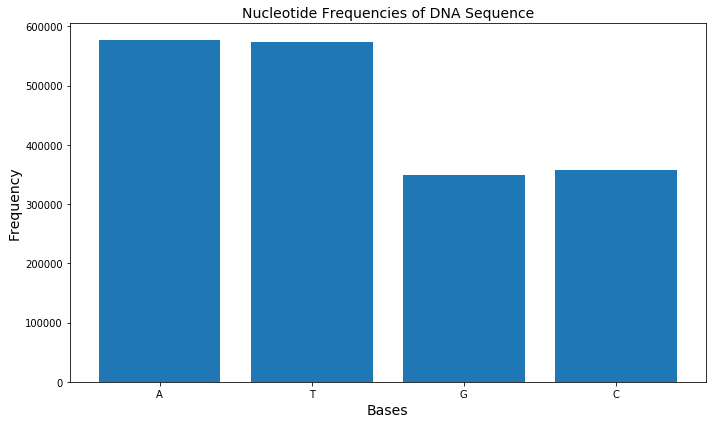

In [99]:
# make bar plot 
plt.figure(figsize=(10,6))
import matplotlib.pyplot as plt 
plt.bar(freqs.keys(), freqs.values()) 
plt.title("Nucleotide Frequencies of DNA Sequence", fontsize=14)
plt.xlabel("Bases", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout() 
plt.show() 

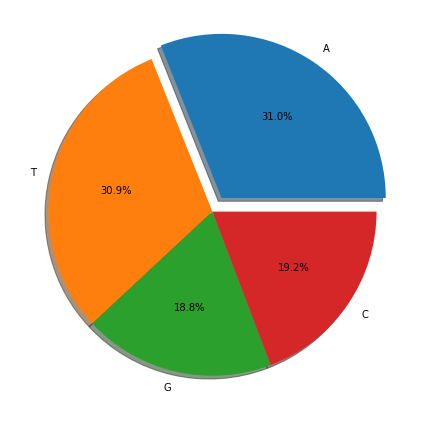

In [62]:
# make a pie chart 
plt.figure(figsize=(10,6))
import matplotlib.pyplot as plt 
explode = (0.1, 0, 0, 0)
plt.pie(freqs.values(), labels=freqs.keys(), autopct='%1.1f%%', shadow=True, explode=explode)
plt.tight_layout() 
plt.show() 

In [69]:
def build_kmers(sequence, ksize):
    kmers = []
    n_kmers = len(sequence) - ksize + 1
    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        kmers.append(kmer)
    return kmers

In [70]:
dimers = build_kmers(seq, 2)

In [71]:
dimers[:3]

['AA', 'AC', 'CC']

In [75]:
from collections import Counter 
dimers_freq = Counter(dimers)

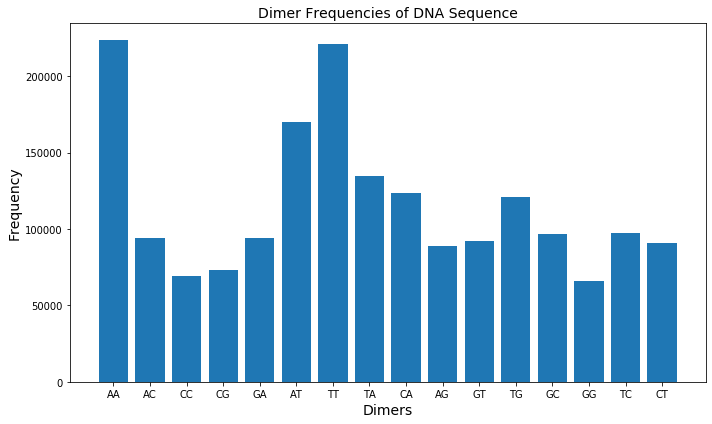

In [76]:
# make bar plot 
plt.figure(figsize=(10,6))
import matplotlib.pyplot as plt 
plt.bar(dimers_freq.keys(), dimers_freq.values()) 
plt.title("Dimer Frequencies of DNA Sequence", fontsize=14)
plt.xlabel("Dimers", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout() 
plt.show() 

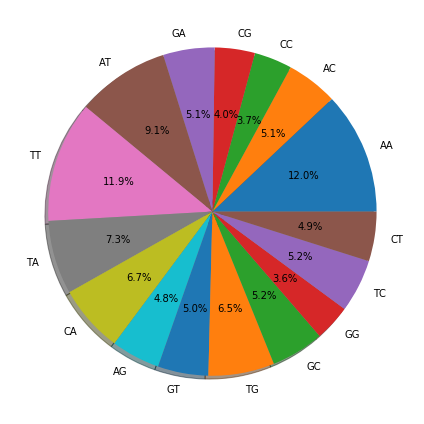

In [78]:
# make a pie chart 
plt.figure(figsize=(10,6))
import matplotlib.pyplot as plt 
plt.pie(dimers_freq.values(), labels=dimers_freq.keys(), autopct='%1.1f%%', shadow=True)
plt.tight_layout() 
plt.show() 

In [105]:
def myscatterplot(xvar,ydict,xlab,ylab):
    """Makes a scatterplot of y-variable(s) against an x-variable"""
    # See http://matplotlib.sourceforge.net/examples/api/date_demo.html
    # for where I got the plotting code from
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    yvarnames = []
    for yvar in ydict:
        yvarnames.append(yvar)
        ax.plot(xvar,ydict[yvar])
    ax.grid(True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    ax.legend(yvarnames, loc="best")
    plt.grid(True)
#     plt.savefig("nt.pdf")
    plt.show()

In [110]:
def ntdensity(seq, windowsize, jumpsize=1000, makeplot=False): 
    lenght = len(seq) 
    freqs = {"A": [], "T": [], "C": [], "G": []}
    seqset = set(seq) 
    midpoints = []
    
    for i in range(0, lenght-windowsize+1, jumpsize): 
        subseq = seq[i:i + windowsize]
        for letter in seqset: 
            num = seq.count(letter)
            pc = 100* (num/windowsize)
            freqs[letter].append(pc) 
            midpoint = (i + i + windowsize)/2 
            midpoints.append(midpoint)
    if makeplot: 
        midpoints2 = [x/1000 for x in midpoints]   
        myscatterplot(midpoints2, 'Base-pair position (kb)','%')
           
    return (midpoints, freqs) 

In [114]:
fig = ntdensity(seq, windowsize=1000, makeplot=True)
fig

TypeError: myscatterplot() missing 1 required positional argument: 'ylab'

In [86]:
mid[:4]

[500.0, 500.0, 500.0, 500.0]

In [89]:
freq['A']

[57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999999996,
 57607.799999

In [90]:
import matplotlib.pyplot as plt 
def myscatterplot(xvar,ydict,xlab,ylab):
    """Makes a scatterplot of y-variable(s) against an x-variable"""
    # See http://matplotlib.sourceforge.net/examples/api/date_demo.html
    # for where I got the plotting code from
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    yvarnames = []
    for yvar in ydict:
        yvarnames.append(yvar)
        ax.plot(xvar,ydict[yvar])
    ax.grid(True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    ax.legend(yvarnames, loc="upper right")
    plt.grid(True)
    plt.show()

TypeError: string indices must be integers

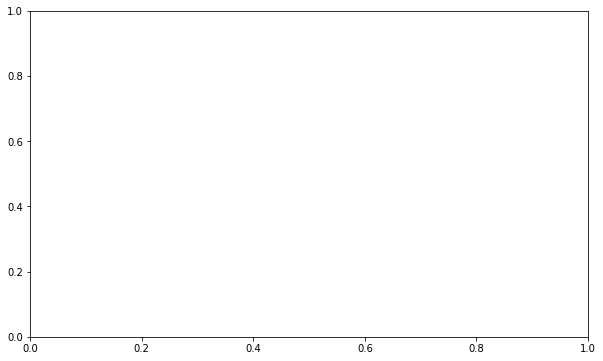

In [104]:
# midpoints2
myscatterplot(midpoints2, "X", "Y", "Z")

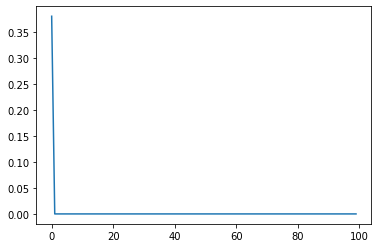

In [97]:
def findGCByPos(seq):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in seq:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seq)
plt.plot(range(len(gc)), gc)
plt.show()